<a href="https://colab.research.google.com/github/MagalyCabrera8/TAM-2025-2/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

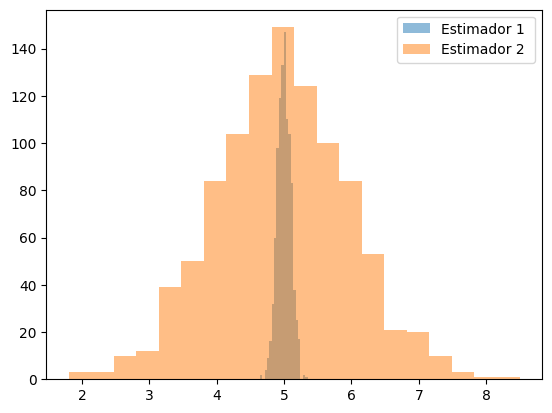

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M = 1000 # número de simulaciones
N = 100
A = 5

A1 = np.zeros((M,1))
A2 = np.zeros((M,1))

for m in range (M): # Recorro una simulación de monte carlo y para cada una simulación me entregan un set de datos
  #print(f'Simulación {m+1}/{M} de Monte Carlo ')
  w = np.random.randn(N) # Se crea el ruido blanco, con media cero
  x = A + w
  #Primer estimados - Promedio de iid verosimilitud por Gaussiana
  A1[m] = np.mean(x)
  #Segundo estimado - Promedio = muestra 1
  A2[m] = x[0]

plt.hist(A1, bins = 20 , label = 'Estimador 1 ',alpha = 0.5)
plt.hist(A2, bins = 20 , label = 'Estimador 2 ', alpha = 0.5)
plt.legend()
plt.show()

(array([0.08711762, 0.        , 0.17423524, 0.04355881, 0.17423524,
        0.13067643, 0.39202929, 0.13067643, 0.34847048, 0.4355881 ,
        0.4355881 , 0.52270572, 0.34847048, 0.34847048, 0.17423524,
        0.13067643, 0.17423524, 0.13067643, 0.04355881, 0.13067643]),
 array([-2.33607196, -2.10649728, -1.87692259, -1.64734791, -1.41777322,
        -1.18819854, -0.95862385, -0.72904917, -0.49947448, -0.2698998 ,
        -0.04032511,  0.18924957,  0.41882426,  0.64839894,  0.87797363,
         1.10754831,  1.337123  ,  1.56669769,  1.79627237,  2.02584706,
         2.25542174]),
 <BarContainer object of 20 artists>)

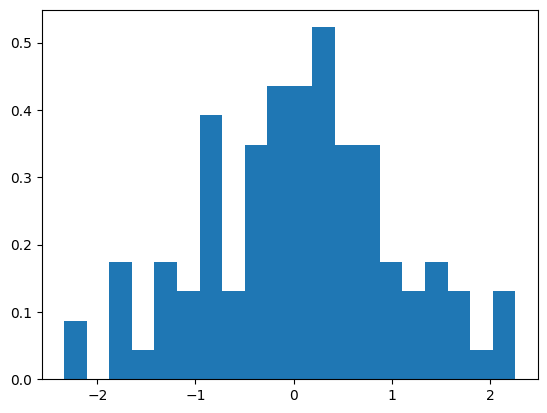

In [ ]:
mx = np.mean(x) # Promedios
mw = np.mean(w)

vw = np.var(w)
vx = np.var(x)

plt.hist(w, bins = 20 , density= True)

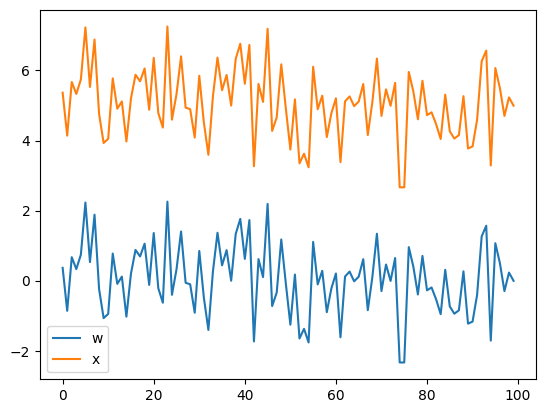

In [ ]:
plt.plot(w,label='w')
plt.plot(x,label='x')
plt.legend()
plt.show()

EJERCICIO

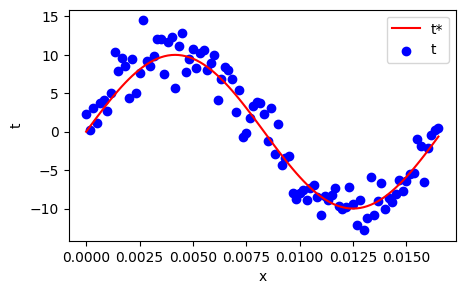

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#función cálculo varianza del ruido a partir del snr dB
def var_snr(x,snrdB): #x vector de datos (señal), snrdB SNR en dB
    Px = np.mean(x**2)#estimador potencia media de la señal
    return Px/(10**(snrdB/10))
#datos simulados
Fo = 60 #frecuencia fundamental señal cos
A = 10 # amplitud de la señal
To = 1/Fo #periodo fundamental
Fs = 100*Fo #frecuencia muestreo según nyquist Fs >= 2 Fo
X = np.arange(0,To,1/Fs) #vector de entrada en un periodo con pasos según período de muestreo

snrdB = 10 #ruido según SNR dB
#señal limpia - objetivo
tt = A*np.sin(2*np.pi*Fo*X)
#modelo con función sinoidal contaminada con ruido Gaussiano
t = A*np.sin(2*np.pi*Fo*X) + np.sqrt(var_snr(tt,snrdB))*np.random.randn(len(X))

X = X.reshape(-1,1)#filas = realizaciones-muestras
t = t.reshape(-1,1)

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='t*')
plt.scatter(X,t,c='b',label='t')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

0


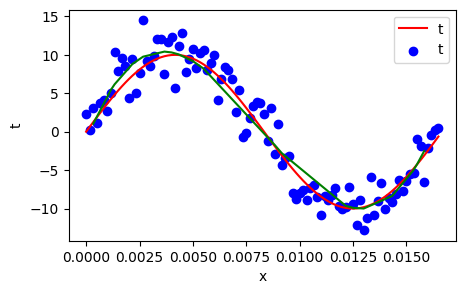

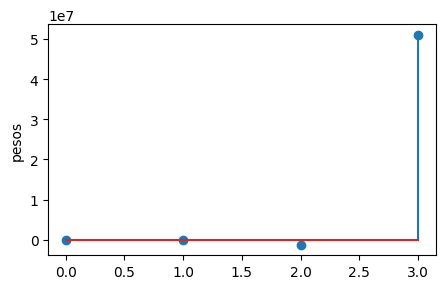

In [ ]:

#solución min cuadrados regularizados
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit


#generación representación polinomial
#desde la libreria sklearn
Q =  3 #grado del polinomio
phiQ = PolynomialFeatures(degree=Q)
Phi = phiQ.fit_transform(X)#representar datos desde polinomio

#particionar datos
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.2)
for i, (train_i, test_i) in enumerate(rs.split(X)):
   print(i)


#regresor
lambdaR = 1e-15#hiperparámetro de regularización
reg_mc = Ridge(alpha=lambdaR)

train_i = np.sort(train_i)
test_i = np.sort(test_i)

reg_mc.fit(Phi[train_i],t[train_i])

t_mc = reg_mc.predict(Phi[test_i])

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='t')
plt.scatter(X,t,c='b',label='t')
plt.plot(X[test_i],t_mc,c='g',label='')

plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5,3))
plt.stem(reg_mc.coef_)
plt.ylabel('pesos')
plt.show()

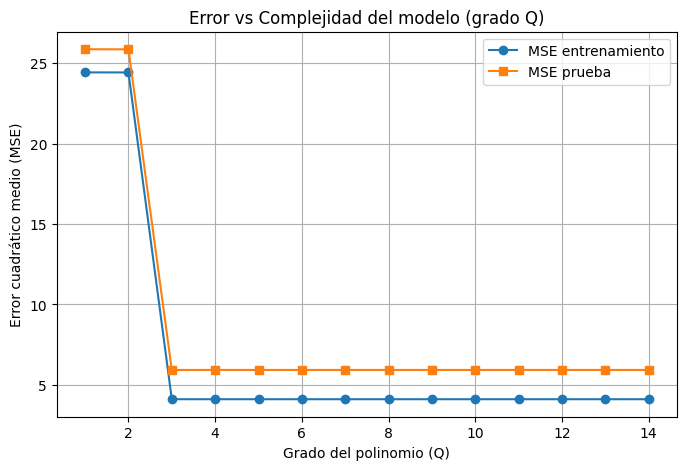

Mejor Q por MSE de prueba: 3  |  MSE_test = 5.924130


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# (opcional) from sklearn.preprocessing import StandardScaler

# ---------------- Parámetros ----------------
lambdaR = 1e-15                 # Regularización (si hay inestabilidad, sube este valor, p.ej. 1e-3)
Q_values = np.arange(1, 15)     # Rango de grados a evaluar (ajústalo)

# ---------------- Partición fija ----------------
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.2)
for train_i, test_i in rs.split(X):
    train_i = np.sort(train_i)
    test_i = np.sort(test_i)

mse_train_list, mse_test_list = [], []

for Q in Q_values:
    # Representación polinómica
    phiQ = PolynomialFeatures(degree=Q, include_bias=True)
    Phi = phiQ.fit_transform(X)

    # (Opcional) Normalizar después del polinomio:
    # scaler = StandardScaler(with_mean=False)  # with_mean=False si usas include_bias=True
    # Phi = scaler.fit_transform(Phi)

    # Regresor Ridge
    reg = Ridge(alpha=lambdaR)
    reg.fit(Phi[train_i], t[train_i])

    # Predicciones
    y_pred_train = reg.predict(Phi[train_i])
    y_pred_test  = reg.predict(Phi[test_i])

    # Errores (MSE)
    mse_train = mean_squared_error(t[train_i], y_pred_train)
    mse_test  = mean_squared_error(t[test_i],  y_pred_test)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# ---------------- Gráfica ----------------
plt.figure(figsize=(8, 5))
plt.plot(Q_values, mse_train_list, marker='o', label='MSE entrenamiento')
plt.plot(Q_values, mse_test_list,  marker='s', label='MSE prueba')
plt.xlabel('Grado del polinomio (Q)')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Error vs Complejidad del modelo (grado Q)')
plt.grid(True)
plt.legend()
plt.show()

# (Opcional) Mejor Q por MSE de prueba
best_q = Q_values[int(np.argmin(mse_test_list))]
print(f"Mejor Q por MSE de prueba: {best_q}  |  MSE_test = {min(mse_test_list):.6f}")


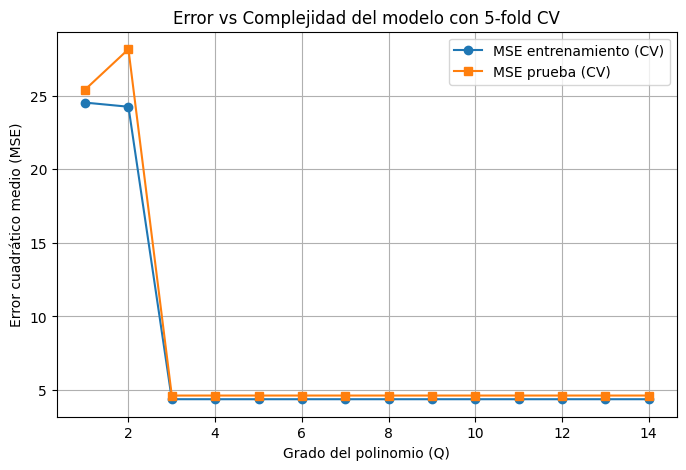

Mejor Q por CV: 3  |  MSE_test = 4.625900


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, KFold
import matplotlib.pyplot as plt
import numpy as np

lambdaR = 1e-15                # Regularización
Q_values = np.arange(1, 15)    # Grados del polinomio
k = 5                          # Folds de CV

mse_train_list, mse_test_list = [], []

for Q in Q_values:
    # Transformación polinómica
    phiQ = PolynomialFeatures(degree=Q, include_bias=True)
    Phi = phiQ.fit_transform(X)

    # Regressor Ridge
    reg = Ridge(alpha=lambdaR)

    # Cross-validation: obtenemos MSE para train y test
    cv = KFold(n_splits=k, shuffle=True, random_state=0)
    scores = cross_validate(
        reg, Phi, t,
        cv=cv,
        scoring="neg_mean_squared_error",
        return_train_score=True
    )

    # Guardamos el promedio de cada fold (cambiando signo)
    mse_train_list.append(-scores["train_score"].mean())
    mse_test_list.append(-scores["test_score"].mean())

# ---------------- Gráfica ----------------
plt.figure(figsize=(8, 5))
plt.plot(Q_values, mse_train_list, marker='o', label="MSE entrenamiento (CV)")
plt.plot(Q_values, mse_test_list, marker='s', label="MSE prueba (CV)")
plt.xlabel("Grado del polinomio (Q)")
plt.ylabel("Error cuadrático medio (MSE)")
plt.title(f"Error vs Complejidad del modelo con {k}-fold CV")
plt.grid(True)
plt.legend()
plt.show()

# Mejor Q según CV
best_q = Q_values[int(np.argmin(mse_test_list))]
print(f"Mejor Q por CV: {best_q}  |  MSE_test = {min(mse_test_list):.6f}")


EJERCICIO PARCIAL

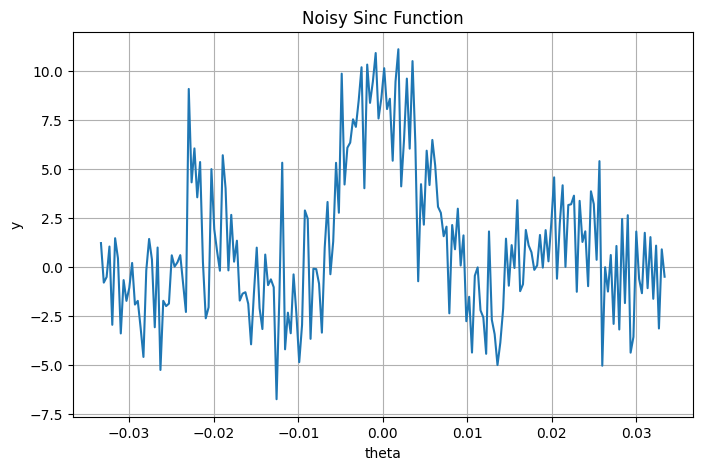

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
A = 10  # Amplitude
Fo = 60 # Frequency
Fs = 100 * Fo # Sampling frequency
To = 1/Fo # Period
snrdB = 10 # SNR in dB

# Define the sinc function with noise
def sinc_noisy(theta, A, Fo, snrdB):
    # Calculate variance of noise based on SNR
    Px = A**2 / 2 # Power of the signal
    var_n = Px / (10**(snrdB/10))
    n = np.sqrt(var_n) * np.random.randn(len(theta)) # Noise

    # Calculate the sinc part
    sinc_part = np.zeros_like(theta, dtype=float)
    # Handle the special case theta * 2 * pi * Fo = 0
    non_zero_indices = (theta * 2 * np.pi * Fo) != 0
    sinc_part[non_zero_indices] = np.sin(theta[non_zero_indices] * 2 * np.pi * Fo) / (theta[non_zero_indices] * 2 * np.pi * Fo)
    sinc_part[~non_zero_indices] = 1.0

    return A * sinc_part + n

# Generate theta values
theta_values = np.linspace(-To*2, To*2, 200)

# Calculate y values using the noisy sinc function
y_values = sinc_noisy(theta_values, A, Fo, snrdB)

# Plot the noisy sinc function
plt.figure(figsize=(8, 5))
plt.plot(theta_values, y_values)
plt.title('Noisy Sinc Function')
plt.xlabel('theta')
plt.ylabel('y')
plt.grid(True)
plt.show()